<h1 style="background-color:white; color:#7C93C3"> Boston Housing Data Analysis</h1><br>
@author Amin

Import modules

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/Users/aminnajafi/Downloads/Boston_Housing_Edited.csv")

In [6]:
data.head()

,crime,proportion_zoned_over_25k,proportion_non_retail_acre,bounds_river,NO_conc,avg_rooms,age,dist_employment_center,index_to_highway,full_value_property_tax,pupil_teacher_ratio_by_town,proportion_of_blacks_by_town,lower_status_of_population,median_value_of_owner_occupied_homes
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([6.3200000e-03, 8.9033080e+00, 1.7800296e+01, 2.6697284e+01,
        3.5594272e+01, 4.4491260e+01, 5.3388248e+01, 6.2285236e+01,
        7.1182224e+01, 8.0079212e+01, 8.8976200e+01]),
 <BarContainer object of 10 artists>)

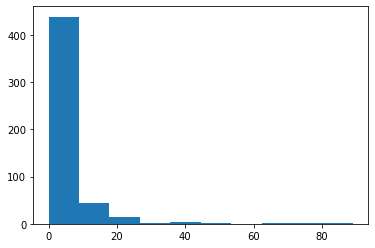

In [17]:
plt.hist(data['crime'])

(array([452.,  36.,  10.,   2.,   2.,   4.]),
 array([  0,  10,  20,  30,  40,  50, 100]),
 <BarContainer object of 6 artists>)

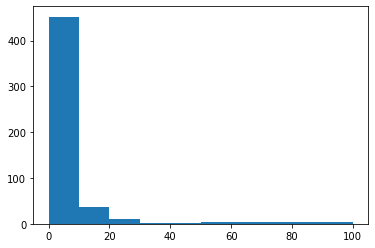

In [15]:
binwidth=0.1
plt.hist(data['crime'], bins=[0, 10, 20, 30, 40, 50, 100])

In [13]:
min(data['crime'])

0.00632

Make a pie chart to plot distribution

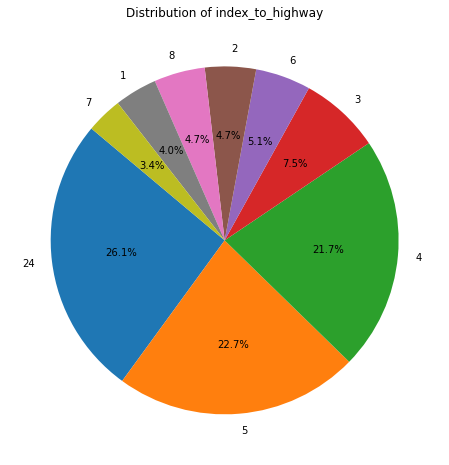

In [18]:
index_to_highway_counts = data['index_to_highway'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(index_to_highway_counts, labels=index_to_highway_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of index_to_highway')
plt.show()

Make a density plot of crime

/Applications/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


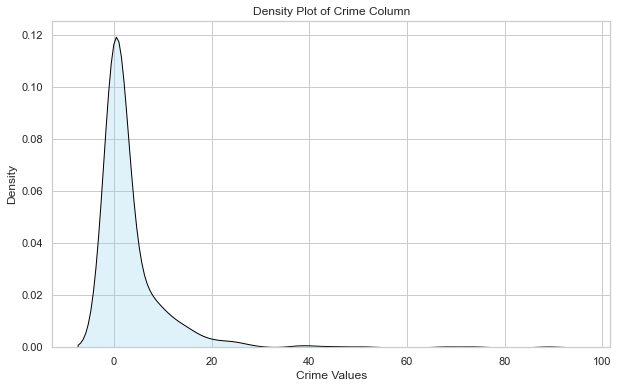

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Replace 'crime' with the actual column name in your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a density plot
sns.kdeplot(data['crime'], fill=True, color='skyblue', edgecolor='black')

plt.title('Density Plot of Crime Column')
plt.xlabel('Crime Values')
plt.ylabel('Density')

plt.show()

Fit a regression line to the scatter plot spanned by the median value of owner occupied homes and crime

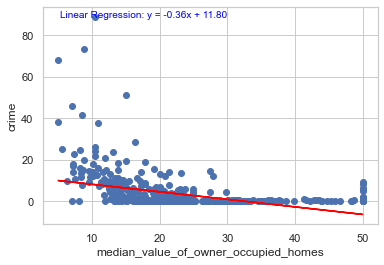

In [39]:
import numpy as np
plt.scatter(x=data['median_value_of_owner_occupied_homes'], y= data['crime'])
plt.xlabel('median_value_of_owner_occupied_homes')
plt.ylabel('crime')

# Fit a linear regression model
fit = np.polyfit(data['median_value_of_owner_occupied_homes'], data['crime'], 1)
b = np.poly1d(fit)

# Plot the regression line
plt.plot(data['median_value_of_owner_occupied_homes'], fit_fn(data['median_value_of_owner_occupied_homes']), color='red')

plt.annotate(f'Linear Regression: y = {fit_fn.coefficients[0]:.2f}x + {fit_fn.coefficients[1]:.2f}',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, color='blue')

# Display the plot
plt.show()

Predict the crime for a specific median value

In [42]:
# Assuming 'median_value' is the value for which you want to predict the crime
median_value = 15  # Replace this with the actual value you want to predict for

# Predict crime using the linear regression model
predicted_crime = fit_fn.coefficients[1] + fit_fn.coefficients[0] * median_value

print(f'Predicted Crime for Median Value {median_value}: {predicted_crime:.2f}')

Predicted Crime for Median Value 15: 6.35


Plot a heatmap of pairwise correlation

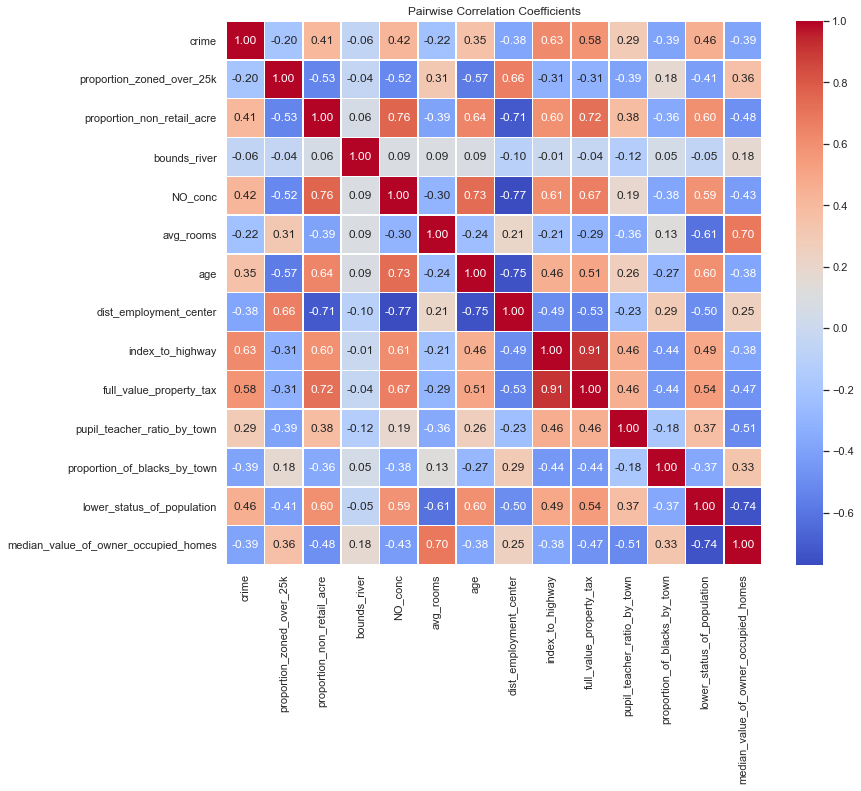

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Replace 'data' with your actual DataFrame

# Calculate pairwise correlation coefficients
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Display the plot
plt.title('Pairwise Correlation Coefficients')
plt.show()


In [44]:
data.head()

,crime,proportion_zoned_over_25k,proportion_non_retail_acre,bounds_river,NO_conc,avg_rooms,age,dist_employment_center,index_to_highway,full_value_property_tax,pupil_teacher_ratio_by_town,proportion_of_blacks_by_town,lower_status_of_population,median_value_of_owner_occupied_homes
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<h3>Multinomial logistic regression model based on the given DataFrame</h3>

    

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'data' is your DataFrame
# Selecting features and continuous target variable
features = data[['NO_conc', 'dist_employment_center']]
target_continuous = data['age']

# Binning the 'age' variable into multiple classes
# Adjust the bin edges and labels based on your specific criteria
bins = [0, 30, 40, 50, 60, 70, float('inf')]
labels = ['0-30', '30-40', '40-50', '50-60', '60-70', '70+']

# Creating a new column with the assigned age classes
data['age_class'] = pd.cut(target_continuous, bins=bins, labels=labels, right=False)

# Selecting features and the new categorical target variable
features = data[['NO_conc', 'dist_employment_center']]
target_categorical = data['age_class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_categorical, test_size=0.2, random_state=42)

# Creating and training the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 61.76%
